### Problem Statment
#### Context
##### As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.
#### Objective
##### The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [50]:
print("numpy : ",np.__version__)
print("Pandas : ",pd.__version__)
print("Seaborn : ",sns.__version__)
print("matplotlib : ",plt.__version__)

numpy :  1.26.4
Pandas :  2.2.2
Seaborn :  0.13.2
matplotlib :  3.8.4


### Rose & Sparkiling

In [2]:
# Loading CSV File
df_rose=pd.read_csv("Rose.csv")
df_spark=pd.read_csv("Sparkling.csv")

In [3]:
print(df_rose.head())
print("\n")
print(df_spark.head())

  YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0


  YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471


In [4]:
print(df_rose.tail())
print("\n")
print(df_spark.tail())

    YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0


    YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031


In [5]:
print("Shape of Rose :", df_rose.shape)
print("Shape of Sparkling :", df_spark.shape)

Shape of Rose : (187, 2)
Shape of Sparkling : (187, 2)


In [6]:
print(df_rose.info())
print("\n")
print(df_spark.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB
None


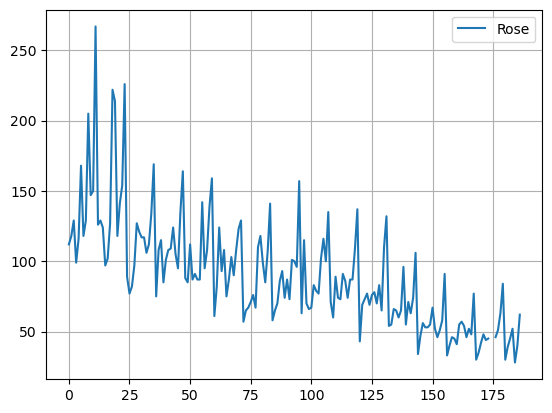

In [7]:
df_rose.plot();
plt.grid()

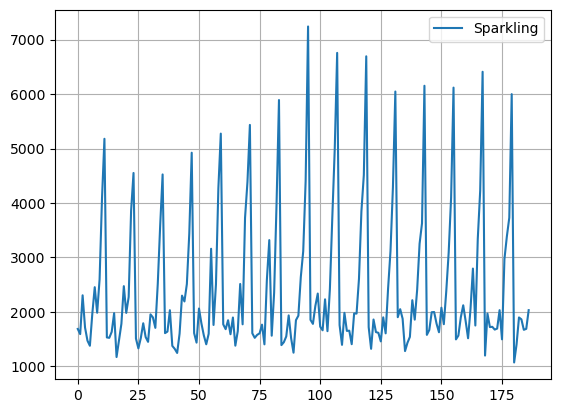

In [8]:
df_spark.plot();
plt.grid()

In [10]:
print(df_rose.describe().round(2))
print("\n",df_spark.describe().round(2))

         Rose
count  185.00
mean    90.39
std     39.18
min     28.00
25%     63.00
50%     86.00
75%    112.00
max    267.00

        Sparkling
count     187.00
mean     2402.42
std      1295.11
min      1070.00
25%      1605.00
50%      1874.00
75%      2549.00
max      7242.00


In [11]:
print("Null values in Rose : \n",df_rose.isnull().sum())
print("\n")
print("Null values in Sparkling : \n",df_spark.isnull().sum())

Null values in Rose : 
 YearMonth    0
Rose         2
dtype: int64


Null values in Sparkling : 
 YearMonth    0
Sparkling    0
dtype: int64


In [3]:
df_rose['Rose'].fillna(df_rose['Rose'].median(),inplace=True)

In [13]:
print("Null values in Rose : \n",df_rose.isnull().sum())
print("\n")
print("Null values in Sparkling : \n",df_spark.isnull().sum())

Null values in Rose : 
 YearMonth    0
Rose         0
dtype: int64


Null values in Sparkling : 
 YearMonth    0
Sparkling    0
dtype: int64


In [14]:
print(df_rose.info())
print("\n")
print(df_spark.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       187 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB
None


In [4]:
date_rose = pd.date_range(start='1/1/1980', end='8/1/1995', freq='ME')
df_rose['Time_Stamp'] = pd.DataFrame(date_rose,columns=['Month'])
print(df_rose.head())

  YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31


In [5]:
date_spark = pd.date_range(start='1/1/1980', end='8/1/1995', freq='ME')
df_spark['Time_Stamp'] = pd.DataFrame(date_spark,columns=['Month'])
print(df_spark.head())

  YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31


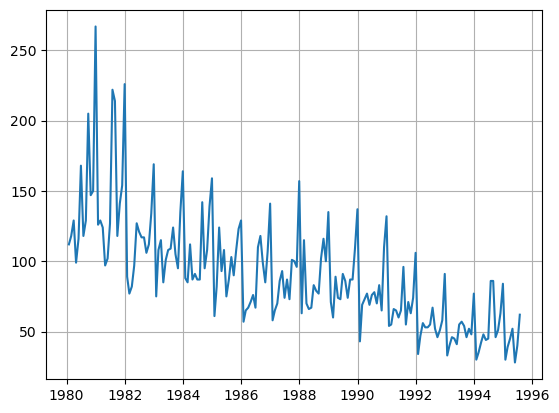

In [6]:
plt.plot(df_rose['Time_Stamp'],df_rose['Rose']);
plt.grid()

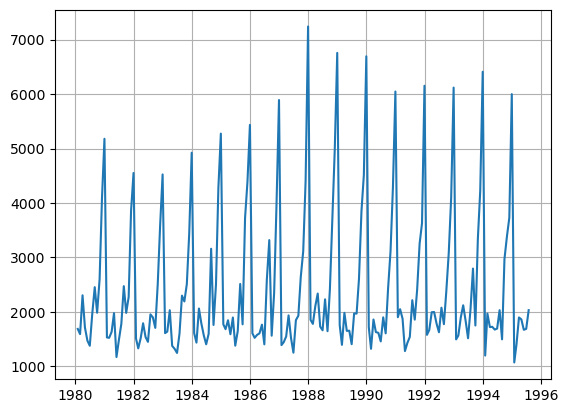

In [8]:
plt.plot(df_spark['Time_Stamp'],df_spark['Sparkling']);
plt.grid()

#### Yearly Production of Rose & Sparkling Wine

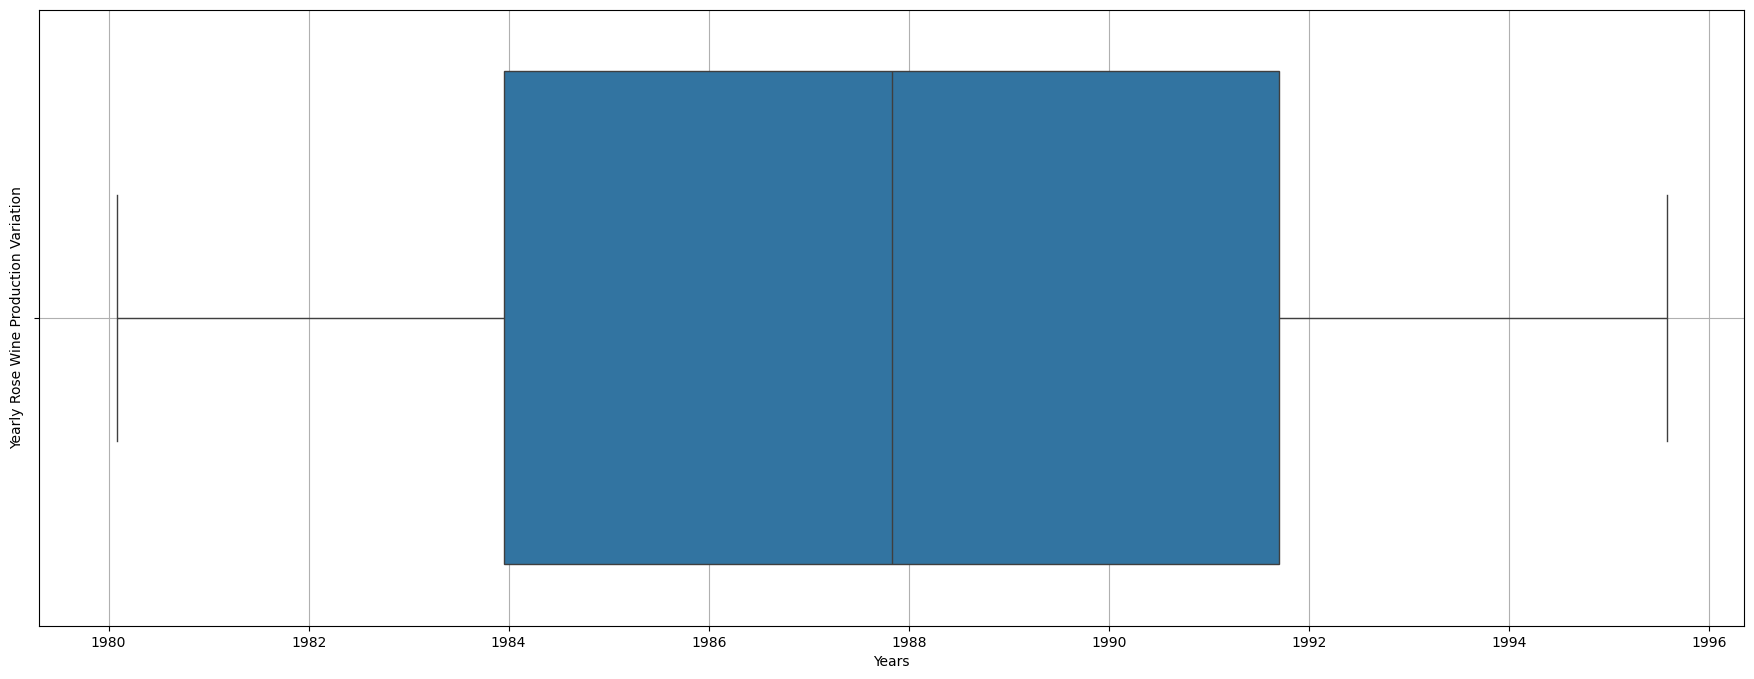

In [20]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x='Time_Stamp', data=df_rose, ax=ax,whis=3)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Rose Wine Production Variation');

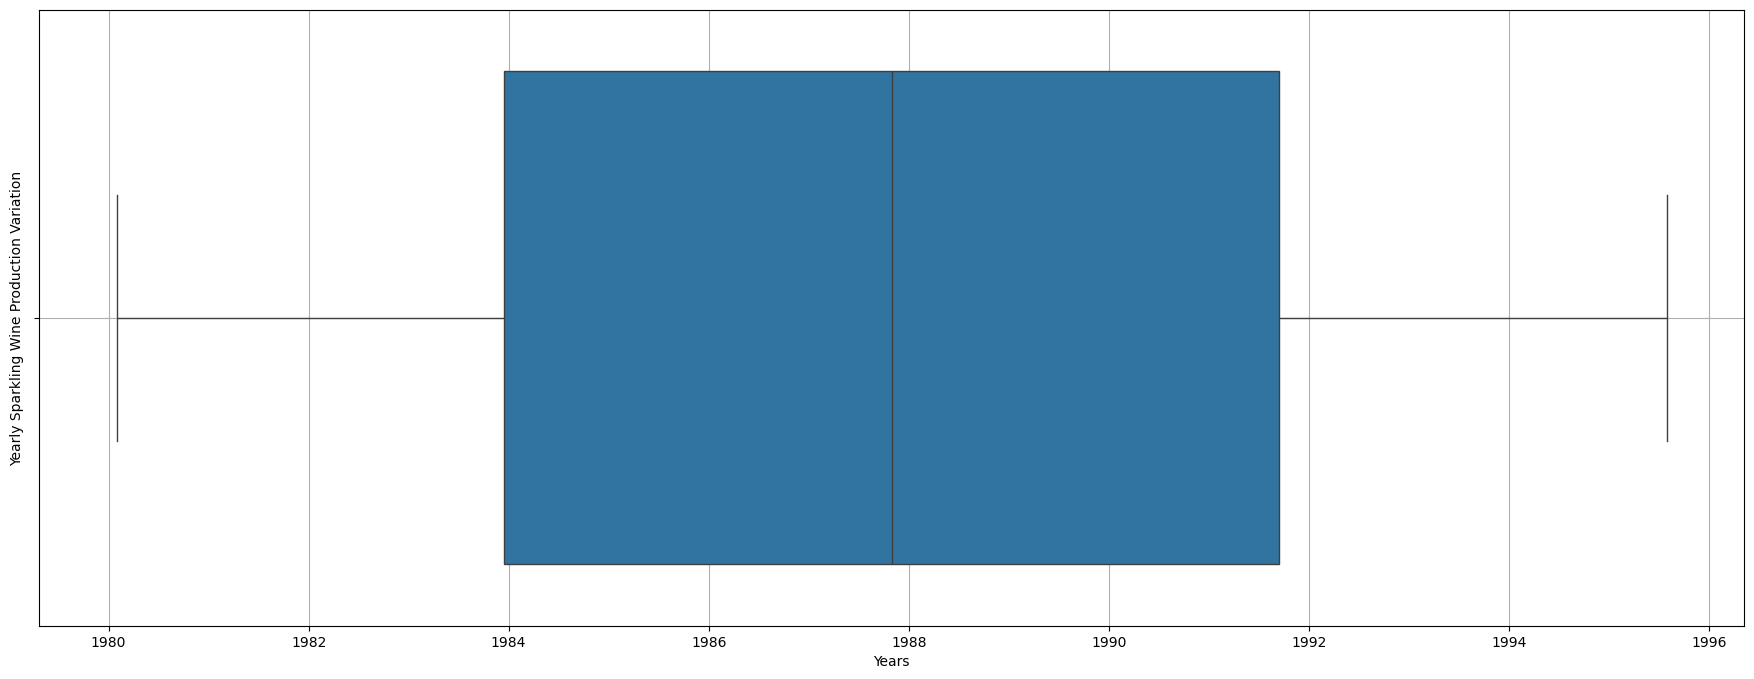

In [24]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x='Time_Stamp', data=df_spark, ax=ax,whis=3)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Sparkling Wine Production Variation');

In [7]:
# Convert the 'YearMonth' column to a datetime format
df_rose['YearMonth'] = pd.to_datetime(df_rose['YearMonth'], format='%Y-%m')

# Extract the year from the 'YearMonth' column
df_rose['Year'] = df_rose['YearMonth'].dt.year

# Display the first few rows to verify the changes
df_rose.head()

,YearMonth,Rose,Time_Stamp,Year
0,1980-01-01,112.0,1980-01-31,1980
1,1980-02-01,118.0,1980-02-29,1980
2,1980-03-01,129.0,1980-03-31,1980
3,1980-04-01,99.0,1980-04-30,1980
4,1980-05-01,116.0,1980-05-31,1980


In [8]:
# Convert the 'YearMonth' column to a datetime format
df_spark['YearMonth'] = pd.to_datetime(df_spark['YearMonth'], format='%Y-%m')

# Extract the year from the 'YearMonth' column
df_spark['Year'] = df_spark['YearMonth'].dt.year

# Display the first few rows to verify the changes
df_spark.head()

,YearMonth,Sparkling,Time_Stamp,Year
0,1980-01-01,1686,1980-01-31,1980
1,1980-02-01,1591,1980-02-29,1980
2,1980-03-01,2304,1980-03-31,1980
3,1980-04-01,1712,1980-04-30,1980
4,1980-05-01,1471,1980-05-31,1980


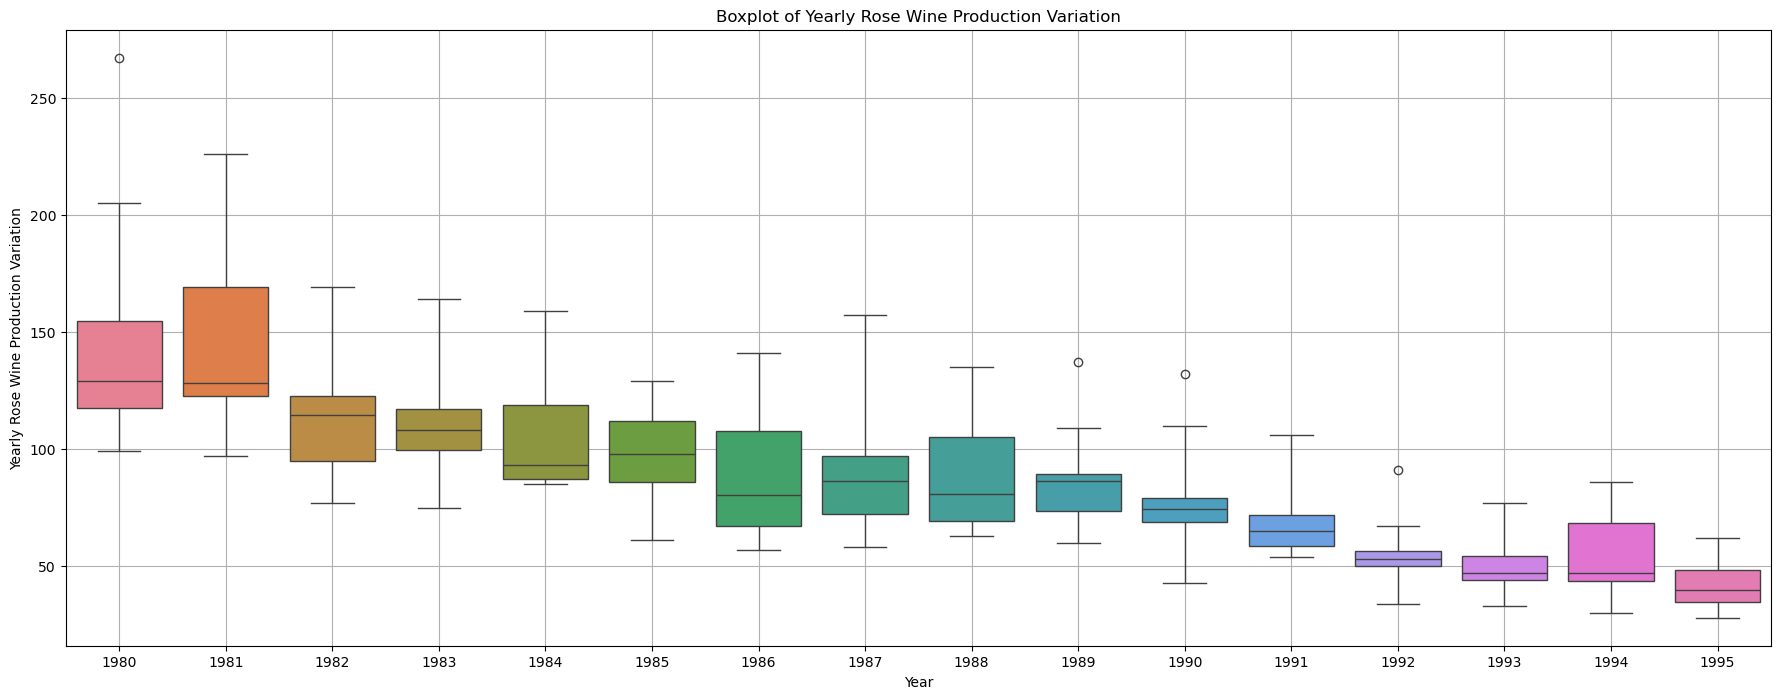

In [9]:
# Create a boxplot showing the variation in yearly rosé wine production
fig, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(x=df_rose['Year'], y=df_rose['Rose'], ax=ax, whis=3,palette='husl')

# Add grid and labels
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Yearly Rose Wine Production Variation")
plt.title("Boxplot of Yearly Rose Wine Production Variation")

# Show the plot
plt.show()

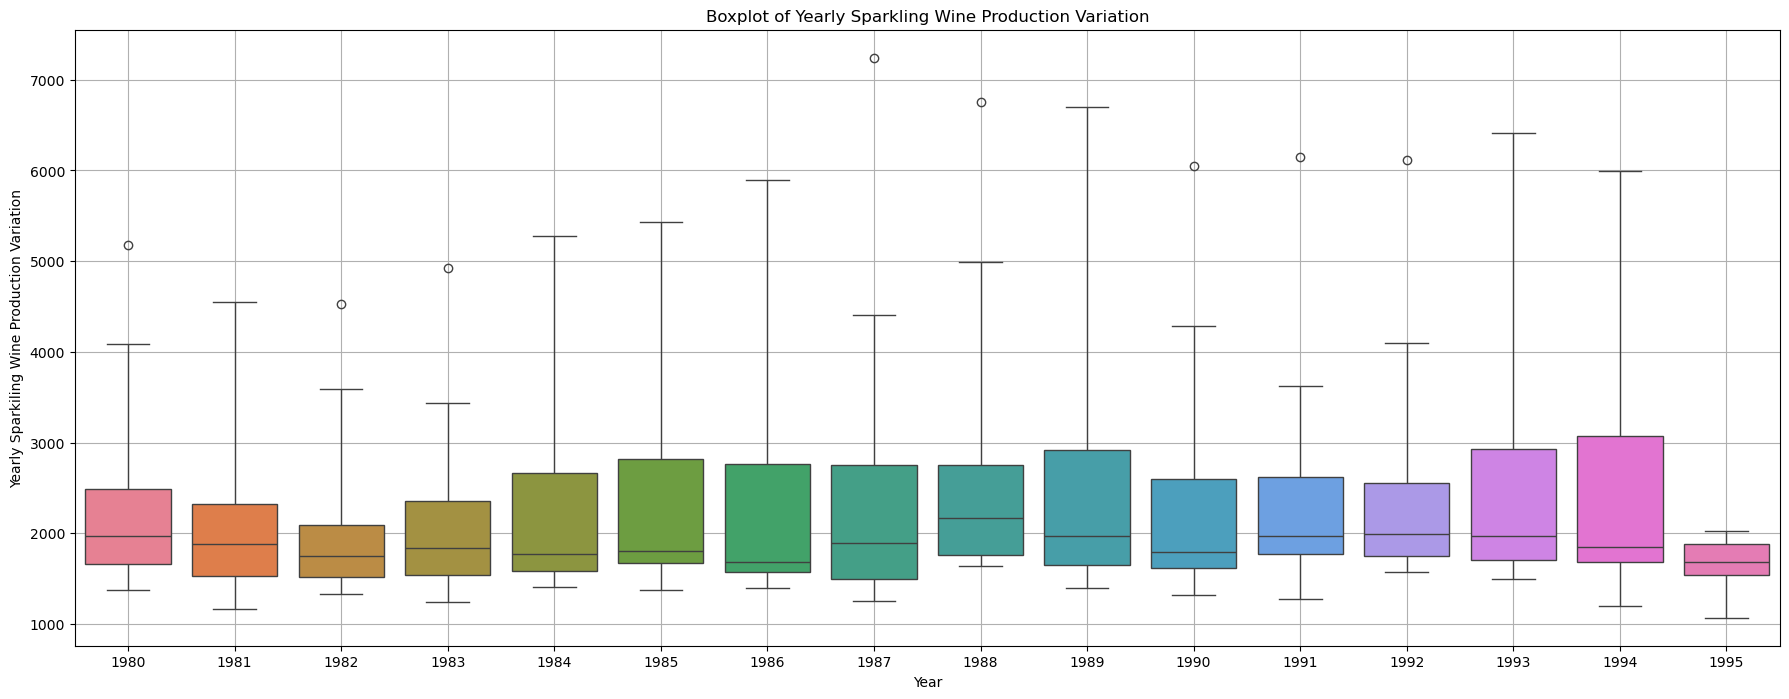

In [10]:
# Create a boxplot showing the variation in yearly rosé wine production
fig, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(x=df_spark['Year'], y=df_spark['Sparkling'], ax=ax, whis=3,palette='husl')

# Add grid and labels
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Yearly Sparkiling Wine Production Variation")
plt.title("Boxplot of Yearly Sparkling Wine Production Variation")

# Show the plot
plt.show()

#### Monthy Production of Rose & Sparkling Wine

In [11]:
# Convert the 'YearMonth' column to a datetime format
df_rose['YearMonth'] = pd.to_datetime(df_rose['YearMonth'], format='%Y-%m')

# Extract the month from the 'YearMonth' column
df_rose['Month'] = df_rose['YearMonth'].dt.month

# Display the first few rows to verify the changes
df_rose.head()

,YearMonth,Rose,Time_Stamp,Year,Month
0,1980-01-01,112.0,1980-01-31,1980,1
1,1980-02-01,118.0,1980-02-29,1980,2
2,1980-03-01,129.0,1980-03-31,1980,3
3,1980-04-01,99.0,1980-04-30,1980,4
4,1980-05-01,116.0,1980-05-31,1980,5


In [14]:
# Convert the 'YearMonth' column to a datetime format
df_spark['YearMonth'] = pd.to_datetime(df_spark['YearMonth'], format='%Y-%m')

# Extract the month from the 'YearMonth' column
df_spark['Month'] = df_spark['YearMonth'].dt.month

# Display the first few rows to verify the changes
df_spark.head()

,YearMonth,Sparkling,Time_Stamp,Year,Month
0,1980-01-01,1686,1980-01-31,1980,1
1,1980-02-01,1591,1980-02-29,1980,2
2,1980-03-01,2304,1980-03-31,1980,3
3,1980-04-01,1712,1980-04-30,1980,4
4,1980-05-01,1471,1980-05-31,1980,5


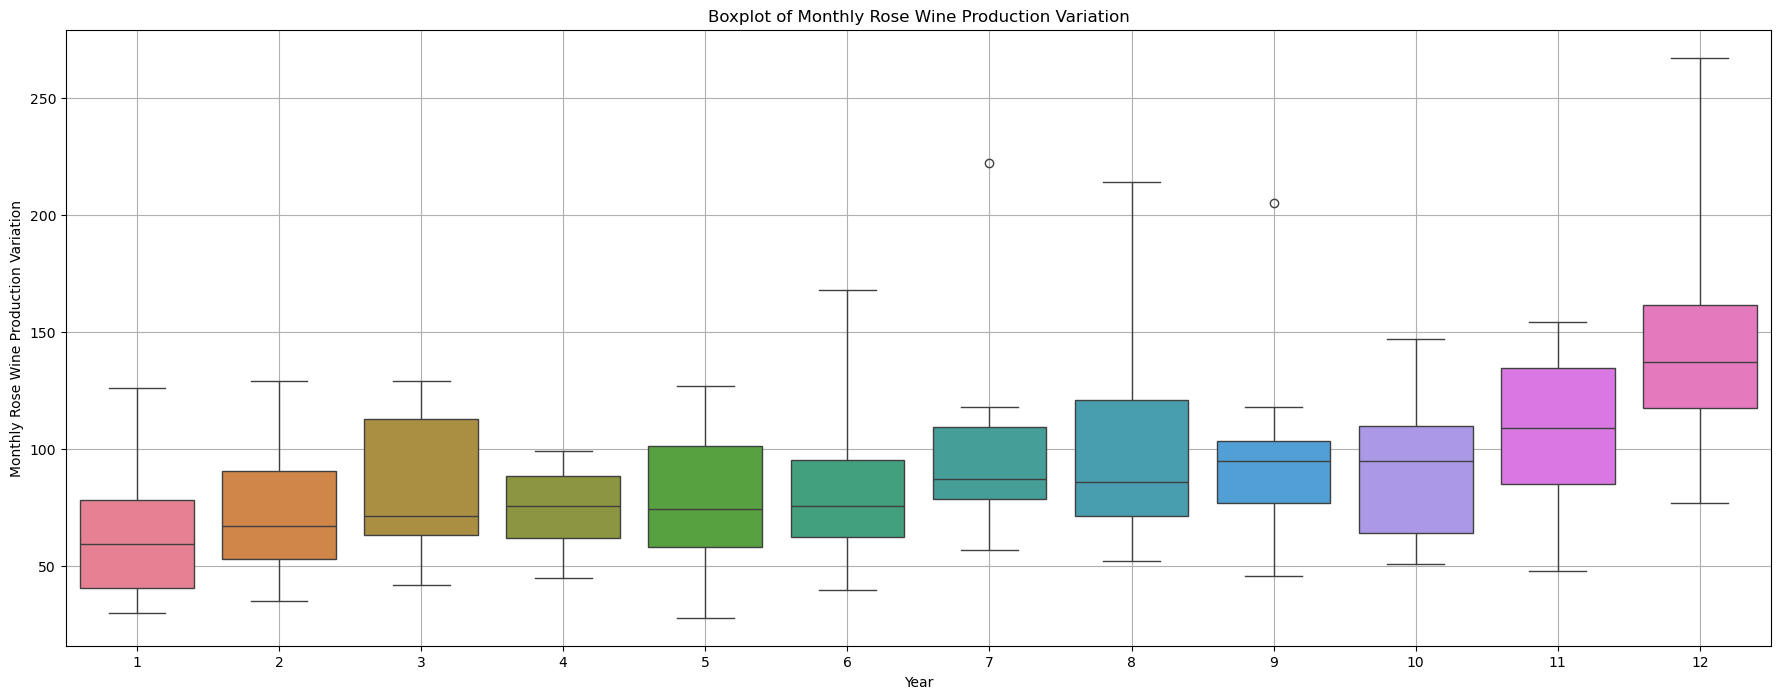

In [15]:
# Create a boxplot showing the variation in yearly rosé wine production
fig, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(x=df_rose['Month'], y=df_rose['Rose'], ax=ax, whis=3,palette='husl')

# Add grid and labels
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Monthly Rose Wine Production Variation")
plt.title("Boxplot of Monthly Rose Wine Production Variation")

# Show the plot
plt.show()

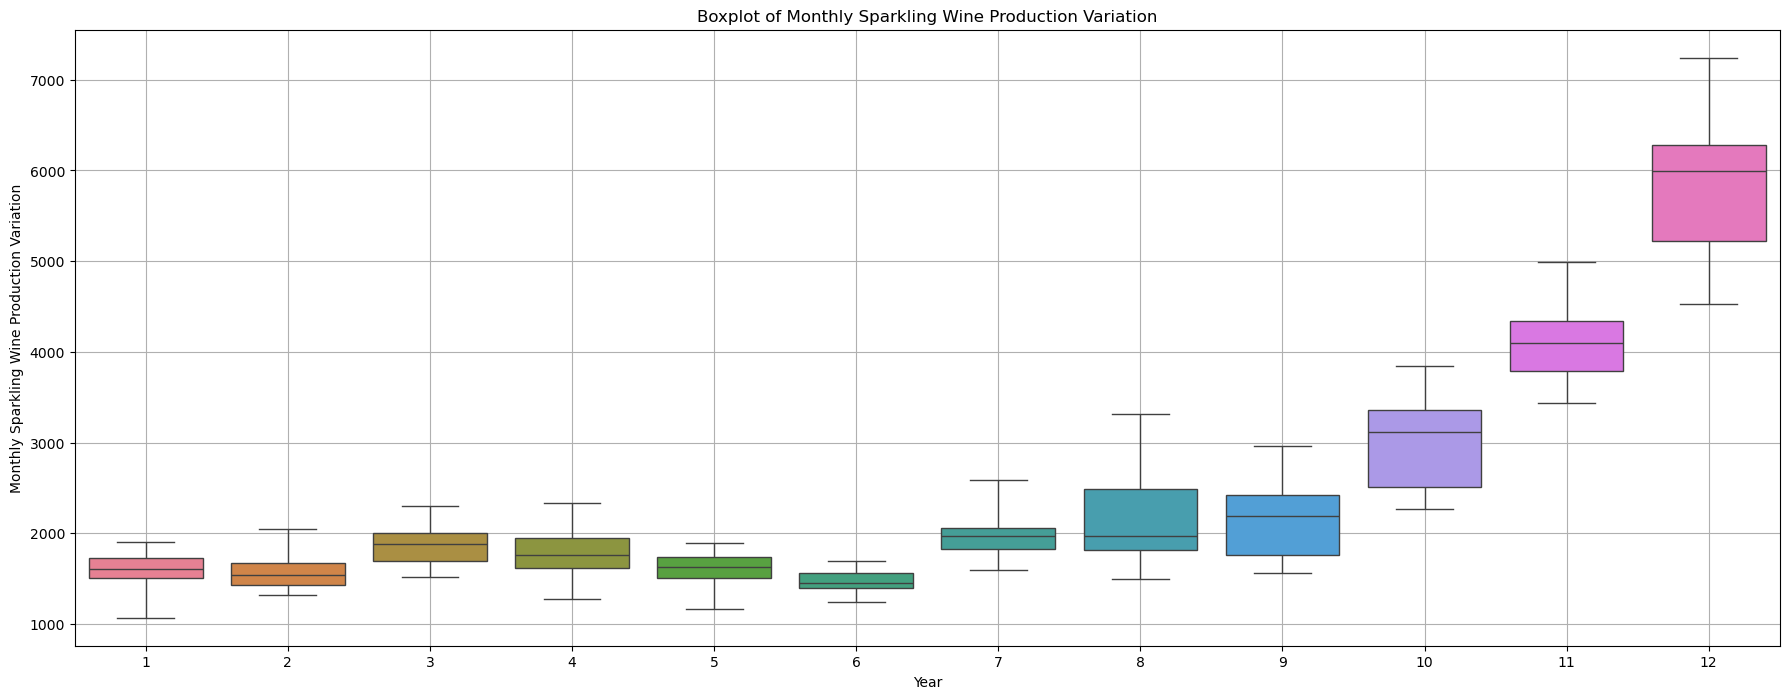

In [17]:
# Create a boxplot showing the variation in yearly rosé wine production
fig, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(x=df_spark['Month'], y=df_spark['Sparkling'], ax=ax, whis=3,palette='husl')

# Add grid and labels
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Monthly Sparkling Wine Production Variation")
plt.title("Boxplot of Monthly Sparkling Wine Production Variation")

# Show the plot
plt.show()

#### Monthly sales across Years for Rose & Sparkling Wine

In [22]:
yearly_sales_months_rose = pd.pivot_table(df_rose, values = 'Rose', columns = 'Month', index = 'Year')
yearly_sales_months_rose

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


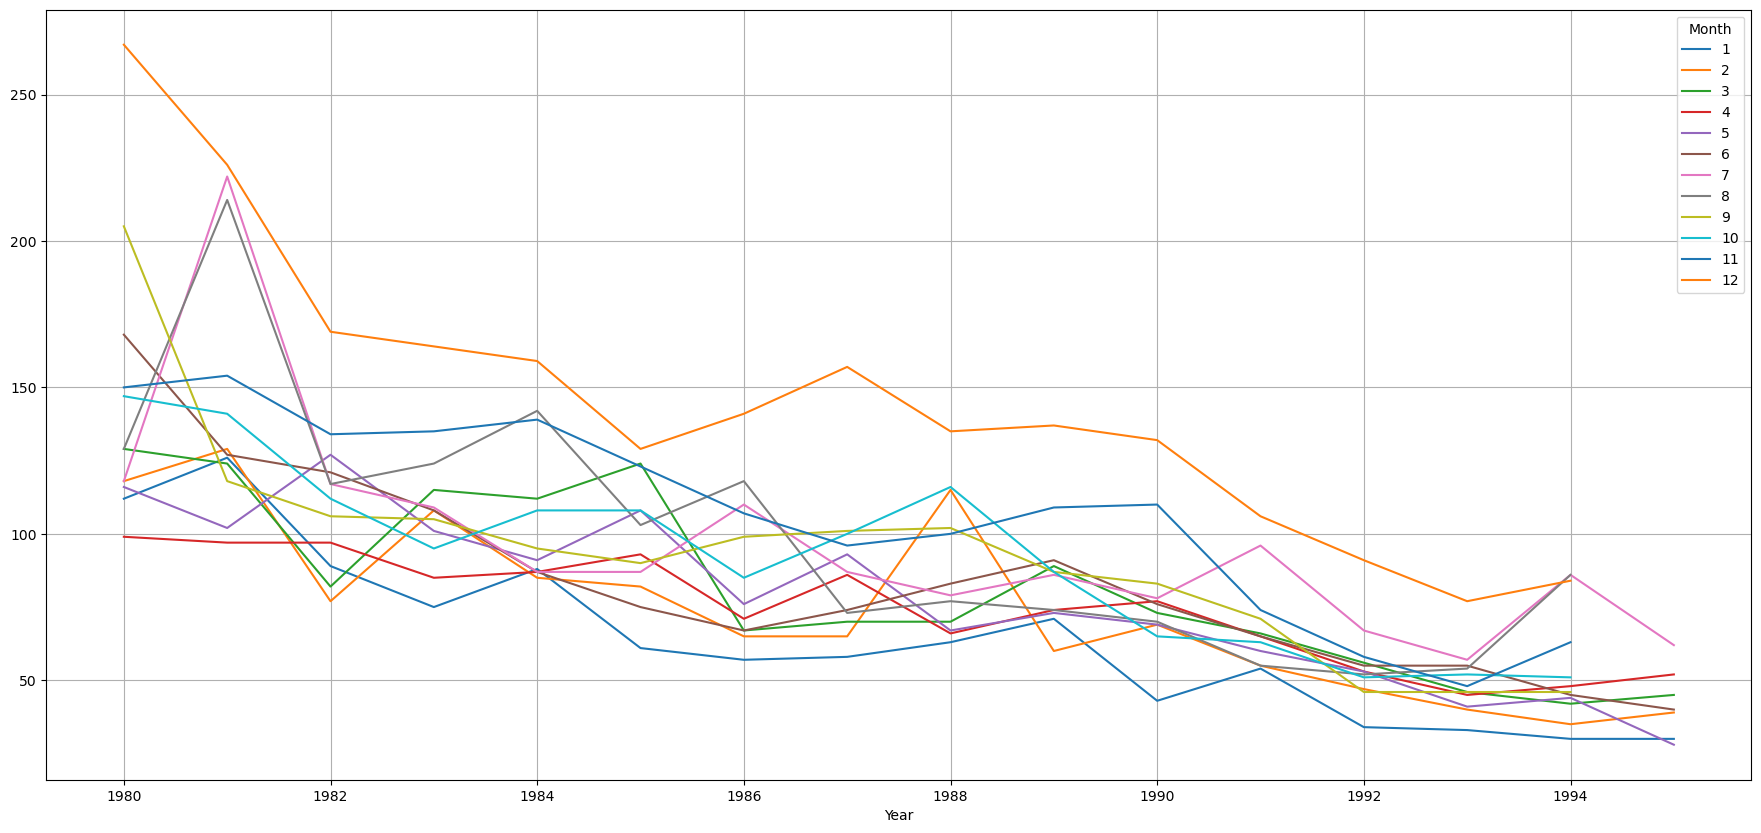

In [24]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_months_rose.plot(ax=ax)
plt.grid();

In [23]:
yearly_sales_months_spark = pd.pivot_table(df_spark, values = 'Sparkling', columns = 'Month', index = 'Year')
yearly_sales_months_spark

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


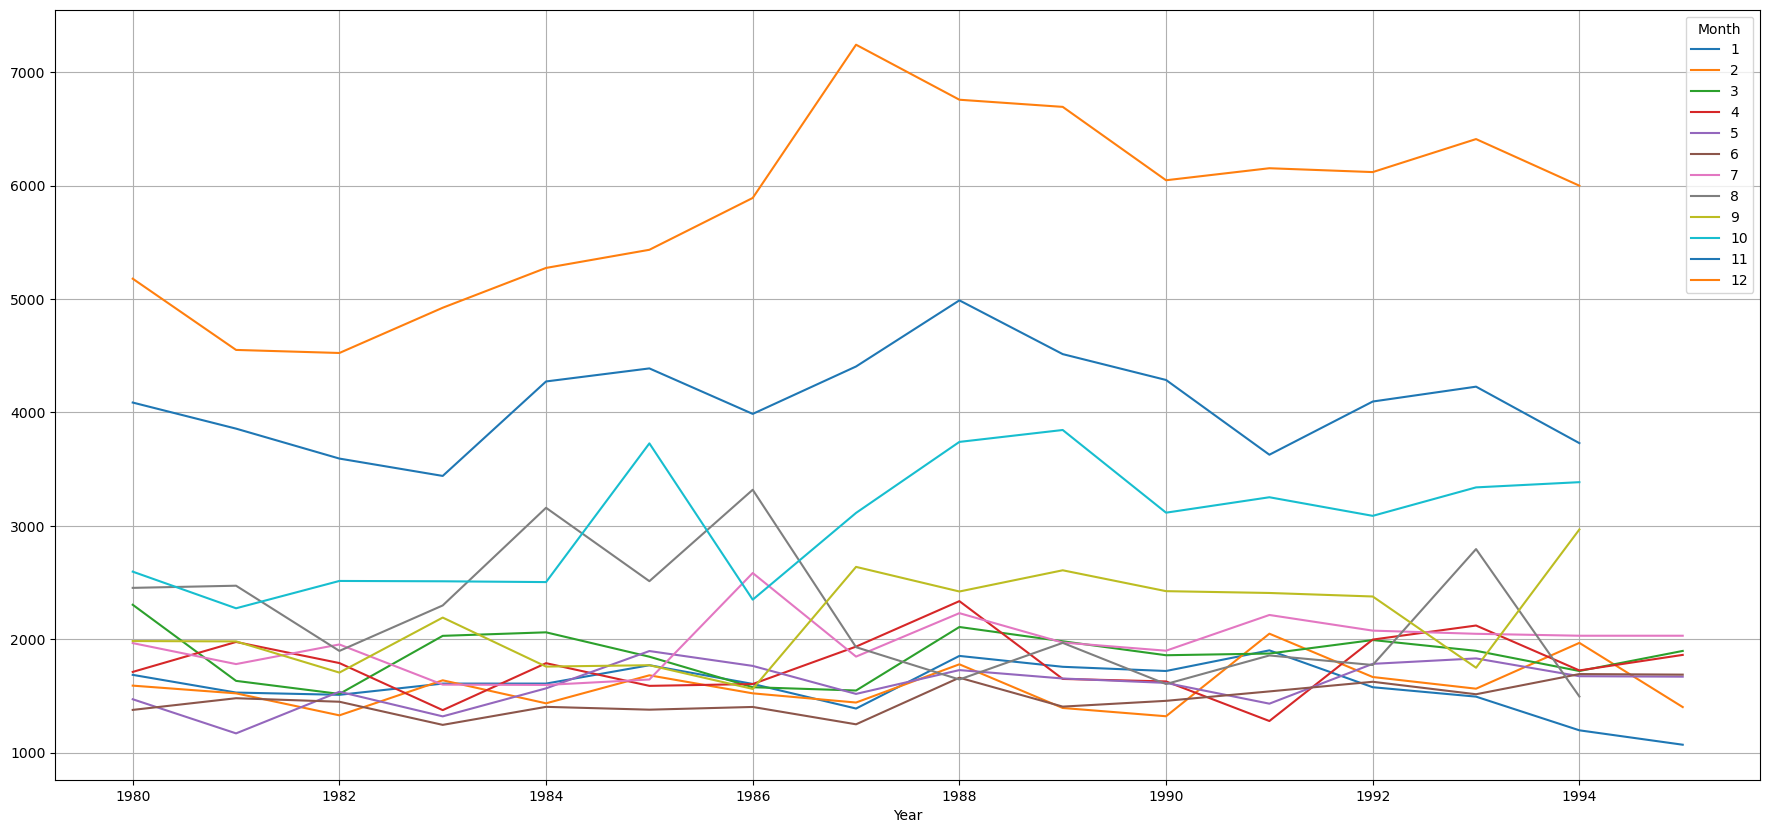

In [25]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_months_spark.plot(ax=ax)
plt.grid();

#### Yearly Plot

In [43]:
# Ensure 'YearMonth' is converted to datetime and set as the index
df_rose['Year'] = pd.to_datetime(df_rose['Year'], format='%Y-%m')
df_rose.set_index('Year', inplace=True)

# Resample by year ('Y') and calculate the sum for the 'Rose' column
df_yearly_rose = df_rose.resample('Y').sum()

# Display the yearly summed data
df_yearly_rose

KeyError: 'Year'